# Bellabeat Data Analysis Case Study

## Introduction
Bellabeat, a high-tech manufacturer of health-focused products for women, is aiming to become a larger player in the global smart device market. This case study's goal is to analyze smart device data to understand how consumers are using their smart devices, and utilize this knowledge to improve one of Bellabeat's products as well as make high-level recommendations for Bellabeat's marketing strategy.

### Data
The data used in this case study was the provide one: [FitBit Fitness Tracker Data](http://www.kaggle.com/arashnic/fitbit). It is publicly available on Kaggle. The data was collected by Amazon Mechanical Turk through a survey from 03-12-2016 to 05-12-2016, and 30 FitBit users were involved. The data primarily tracked participants' physical activity, sleep, steps, and calories burned.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Organizing
My first step in this case study was to do a high-level scan of the raw data, pick out ones I needed, and remove any inconsistencies.

I then moved onto organizing data, where I focused on setting up datasets so that they could be easily visualized. I did so by aggregating attributes of datasets on a temporal basis. Afterwards, I merged the datasets into two main datasets: health statistics measured per day, and health statistics measured per hour. Much of the details of this process will be elaborated later on in this notebook.

### Purpose
Having a dataset based on days allows the Bellabeat app to set high-level, daily goals for its users to reach. These are broad goals such as getting X minutes of sleep or getting X steps in to reach a calorie deficit.

A dataset based on hours enables the Bellabeat app to set up hourly schedules based on users' goals. Then, the app would be able to send intermittent reminders throughout the day as a form of accountability and motivation.

### Limitations
It is important to note that the dataset provided is not sufficient to cover the business task. First of all, there are only 30 respondants, which is probably not enough for us to make inferences about the general public. Not only that, to extrapolate Bellabeat's users smart device usage based on 30 respondants we are not given info on how they are chosen is risky. There is not any sort of supporting evidence that this extrapolation is something we can base our decisions off of. Moreover, there were records where users took 0 steps for the day. That is highly unlikely, and we do not know the reason why: was it a fitbit malfunction, or did the user just forget to record? This dataset is from a third party provider, is not current data, and although there is proper citation to the authors and source of the dataset, the source of the dataset does not provide a comprehensive report on how they gathered their data. This data, overall, is rather unreliable.

In [2]:
dayStress = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
dayCalorie = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
dayStep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
dayIntensity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
daySleep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

hourCalorie = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourStep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourIntensity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

In [3]:
days = dayStress['Time'].str.split(expand=True)[0]
stressTemp = dayStress
stressTemp['Time'] = days
stressTemp = stressTemp.rename(columns={'Time':'Day'})
stressTemp = stressTemp.groupby(['Id', 'Day']).sum()
dayStressClean = stressTemp

* Replaced the **day + hour** value in the Time column with just the **day**.
* Grouped dataset on **Id & Day** to aggregate total heartrate by days.
* Did all this in order to prepare the data to be merged with other health datasets that were measured by days.

In [4]:
dayIntensity = dayIntensity[['Id', 'ActivityDay', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']]
dayGroup = dayCalorie.merge(dayStep, on=['Id', 'ActivityDay'], how='inner')
dayGroup = dayGroup.merge(dayIntensity, on=['Id', 'ActivityDay'], how='inner')
daySleepTemp = daySleep[['Id', 'SleepDay', 'TotalMinutesAsleep']]
daySleepTemp = daySleepTemp.rename(columns={'SleepDay':'ActivityDay'})
daySleepTemp['ActivityDay'] = daySleepTemp['ActivityDay'].str.split(expand=True)[0]
dayGroup = dayGroup.merge(daySleepTemp, on=['Id', 'ActivityDay'], how='inner')
dayGroup = dayGroup.rename(columns={'ActivityDay':'Day','Calories':'CaloriesBurned', 'StepTotal':'Steps',
                                    'LightlyActiveMinutes':'LightMins', 'FairlyActiveMinutes':'MedMins',
                                    'VeryActiveMinutes':'HighMins'})
dayGroup = dayGroup.merge(dayStressClean, on=['Id', 'Day'], how='inner')
dayGroupClean = dayGroup[dayGroup['Steps']!=0]

* Merged five datasets: **Daily Calories Burned, Daily Intensity, Daily Sleep, Daily Steps, and Daily Sleep**. Now there exists a dataset that has all the health data measured by days in one single source.
* Also took out bad data, most notably when almost all the attributes in a record = 0. This likely meant that there was an error in the database, or the fitbit was not tracking on that day. Now that all daily health data is located in one dataset, it is easier to begin visualizing correlations and trends.

In [5]:
hourIntensity = hourIntensity[['Id', 'ActivityHour', 'TotalIntensity']]
hourGroup = hourCalorie.merge(hourStep, on=['Id', 'ActivityHour'], how='inner')
hourGroup = hourGroup.merge(hourIntensity, on=['Id', 'ActivityHour'], how='inner')

* Same idea behind the daily health dataset, except this one is an hourly health dataset. Unfortunately, there does not exist an hourly sleep or hourly heart rate dataset, so the hourly health dataset is less thorough than the daily health dataset. However, it may still provide valuable insights into users' habits.

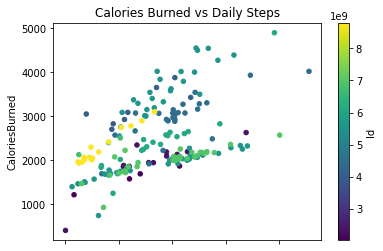

In [6]:
dayScatterCaloriesSteps = dayGroupClean.plot.scatter(x='Steps',
                                        y='CaloriesBurned',
                                        c='Id',
                                        colormap='viridis',
                                        title='Calories Burned vs Daily Steps')

* Here we see a decently strong correlation between the amount of calories burned and daily steps taken. This is a more obvious correlation we'd expect to see already, but we can use the numbers in the dataset to set a rough goal.
* For example: to burn X calories, users would need to take Y steps.

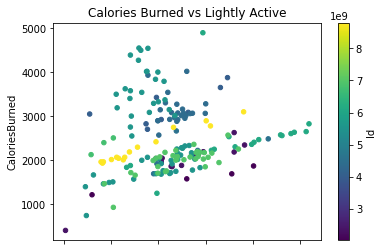

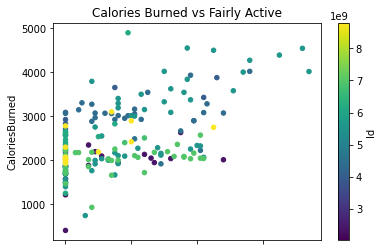

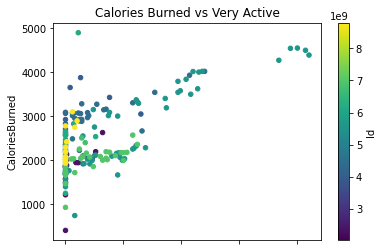

In [7]:
dayScatterCaloriesMed = dayGroupClean.plot.scatter(x='LightMins',
                                                    y='CaloriesBurned',
                                                    c='Id',
                                                    colormap='viridis',
                                                    title='Calories Burned vs Lightly Active')
dayScatterCaloriesMed = dayGroupClean.plot.scatter(x='MedMins',
                                                    y='CaloriesBurned',
                                                    c='Id',
                                                    colormap='viridis',
                                                    title='Calories Burned vs Fairly Active')
dayScatterCaloriesLight = dayGroupClean.plot.scatter(x='HighMins',
                                                    y='CaloriesBurned',
                                                    c='Id',
                                                    colormap='viridis',
                                                    title='Calories Burned vs Very Active')

### Calories Burned and Daily Light Activity
* The first graph shows a mediocre correlation between calories burned and daily light activity.
* Because so many users have days where they are only lightly active, visualizing calories burned vs fairly active or very active has a lot of points on 0 on the x-axis, which doesn't tell us much.


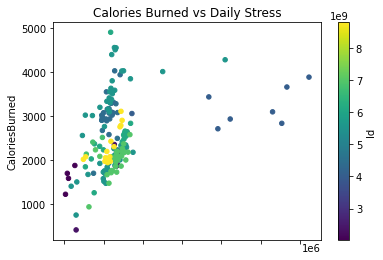

In [8]:
dayScatterCaloriesStress = dayGroupClean.plot.scatter(x='Value',
                                                      y='CaloriesBurned',
                                                      c='Id',
                                                      colormap='viridis',
                                                      title='Calories Burned vs Daily Stress')

### Calories Burned and Daily Stress
* Daily stress, represented by total heart rate (summed heart rates per 5 seconds in the entire day) shows a strong, positive correlation with calories burned, but only for a certain range.
* This is likely due to the fact that if heart rate skyrockets too high, it is no longer representative of physical exercise, which means it's not beneficial for calorie burning.
* Thus, we can see that there is a healthy range of heartrates that is good at calorie burning.
* There is the case that someone's high heart rate could be due to extenuating factors such as going through an extremely stressful situation, but that is not something our dataset accounted for unfortunately.

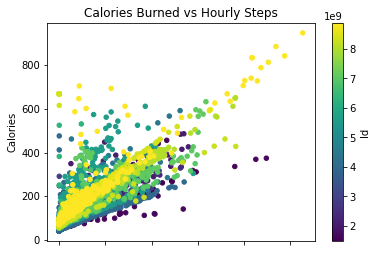

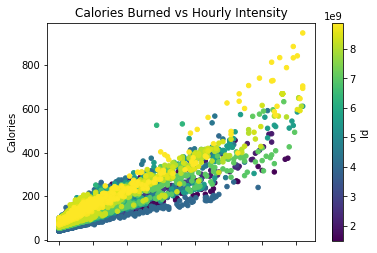

In [9]:
hourScatterCaloriesSteps = hourGroup.plot.scatter(x='StepTotal',
                                                  y='Calories',
                                                  c='Id',
                                                  colormap='viridis',
                                                  title='Calories Burned vs Hourly Steps')
hourScatterCaloriesSteps = hourGroup.plot.scatter(x='TotalIntensity',
                                                  y='Calories',
                                                  c='Id',
                                                  colormap='viridis',
                                                  title='Calories Burned vs Hourly Intensity')

### Calories Burned and Hourly Steps and Intensity
* The hour graphs show cleaner correlations than graphs in the day graphs.
* We have a much clearer picture as to how to reach specific calorie burn goals.

## Data Analysis Conclusions
* Unfortunately, this dataset does not provide us with much. We are mainly working off correlations. And while many of them do suggest a causation (more steps = more burnt calories), the fact that we aren't given any more information makes it so that we are completely unaware of many potential confounding factors. This makes it rather risky to extrapolate and base decisions off of.

## Recommendations
* Market the Bellabeat app as a companion that will help you set daily/weekly goals and an hourly schedule. The app will intermittently notify users to complete tasks per the hourly schedule. Additionally, if we're marketing the app as a "companion", the app should "grow" with us so it feels personalized and that there is someone actually growing alongside you.
* Implement a weight-loss function that specifically focuses on burning calories. It should be done through the recommendation above, and set steps and physical intensity as primary predictors of burning calories.
* Due to the provided data's limitations, conduct another study handled by us instead of a third party and ask current Bellabeat users as participants. This helps us open different functions like the weight-loss function mentioned above.